# Приоритезация гипотез и анализ A/B теста интернет-магазина

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Часть 0. Подготовительная

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell

from scipy import stats as st
import math as mth

import datetime as dt

In [2]:
#вывод всех столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [3]:
#отображение всех выводов из одной ячейки
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#функция приведения названия колонок к нижнему регистру, замена пробелов на "_"
def rename_col(data):
    data.columns = data.columns.str.lower().str.replace(' ', '_')
    return data.columns

In [5]:
#функция вывод первых 5 строк, общей информации и количества пропусков в таблице
def base_info(data):
    print('Первые 5 строк таблицы')
    display(data.head())
    
    print('Общая информация о таблице')
    display(data.info())
    
    print('Информация о пропусках в таблице')
    display(data.isna().sum())

## Часть 1. Приоритизация гипотез

In [6]:
#сохраняем данные в переменную, разделитель запятая
hyp = pd.read_csv('./datasets/hypothesis.csv', sep=',')

In [7]:
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [8]:
#Приведем названия колонок к общему виду
rename_col(hyp)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [9]:
#Применю метод ICE для приоритизации гипотез. Отсортирую их по убыванию приоритета.
hyp['ICE'] = (hyp.impact * hyp.confidence) / hyp.efforts

print(hyp[['hypothesis', 'ICE']].sort_values('ICE', ascending = False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

**Наиболее приоритетные гипотезы по методу ICE:**

8 - Запустить акцию, дающую скидку на товар в день рождения   
0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 

In [10]:
#Применю метод RICE для приоритизации гипотез. Отсортирую их по убыванию приоритета.
hyp['RICE'] = (hyp.reach*hyp.impact * hyp.confidence) / hyp.efforts

print(hyp[['hypothesis', 'RICE']].sort_values('RICE', ascending = False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

In [11]:
display(hyp[['hypothesis', 'ICE', 'RICE']].sort_values('RICE', ascending = False))

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0


**Наиболее приоритетные гипотезы по методу RICE:**

7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию 

### Выводы по разделу

Приоритизация гипотез при применении RICE вместо ICE изменилась. Это произошло потому, что RICE учитывает охват аудитории, т.е. насколько большое количество пользователей затронут изменения. 

Добавление формы подписки на все основные страницы затрагивает всех пользователей, в то время как запуск акции, дающей скидку в день рождения имеет минимальный охват.

Таким образом, при приоритизации гипотез лучше использовать метод RICE. И в первую очередь проверить гипотезу, что добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, позволит максимизировать ожидаемое улучшение ключевых метрик бизнеса.

## Часть 2. Анализ A/B-теста

### Загрузка данных и подготовка их к анализу

In [12]:
#сохраняем данные в переменные, разделитель запятая
orders, visitors = (
    pd.read_csv('/datasets/orders.csv',sep=','),
    pd.read_csv('/datasets/visitors.csv',sep=',')
)

Изучим данные и выполним предобработку. 

In [13]:
#изучим таблицу с заказами
base_info(orders)

Первые 5 строк таблицы


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Информация о пропусках в таблице


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Пропуски в данных отсутствуют. Переименую колонки для соблюдения общего стиля.

In [14]:
orders = orders.rename(columns = {'transactionId' : 'order_id', 'visitorId' : 'visitor_id'});

In [15]:
#перевод колонки с датой в формат даты
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [16]:
#изучим таблицу с посетителями
base_info(visitors)

Первые 5 строк таблицы


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Информация о пропусках в таблице


date        0
group       0
visitors    0
dtype: int64

Пропуски в данных отсутствуют. 

In [17]:
#перевод колонки с датой в формат даты
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [18]:
#проверка на полные дубликаты строк
print('Количество дубликатов в таблице посетители ', visitors.duplicated().sum())
print('Количество дубликатов в таблице заказы ', orders.duplicated().sum())

Количество дубликатов в таблице посетители  0
Количество дубликатов в таблице заказы  0


Проверю, все ли посетители попадают только в одну группу и находятся в ней до конца эксперимента.

In [19]:
users_ab_dubl = (orders.groupby('visitor_id')
     ['group'].nunique()
     .reset_index()
     .query('group>1')
     ['visitor_id'])

print (f'Количество пользователей, которые попали одновременно в две группы: {users_ab_dubl.count()}')

Количество пользователей, которые попали одновременно в две группы: 58


По правилам A/B тестирования пользователи должны быть в своей группе весь эксперимент, чтобы результаты были чистыми, и мы точно могли определить, что влияет на их поведение. В данном случае, если бы задача была не учебная, то нужно разобраться, из-за чего возникла ошибка и исправить ее на будущее, а в текущем эксперименте, т.к. таких пользователей всего 58, то предлагаю считать их аномалией и исключить ниже в исследовании, когда будем очищать данные.

### Кумулятивные показатели по группам

In [20]:
#создание таблицы с уникальными парами дата - группа
date_group = orders[['date', 'group']].drop_duplicates()

In [21]:
#агрегирую данные кумулятивно по заказам, визитам и выручке для каждой даты и группы
orders_agg = date_group.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'order_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [22]:
#рассчитываю посетителей накопительным итогом для каждой даты и группы
visitors_agg = date_group.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitors': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [23]:
#соединяю кумулятивные данные по заказам, визитам и выручке с посетителями для каждой даты и группы
cum_data = orders_agg.merge(visitors_agg, on=['date', 'group'])

cum_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cum_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [24]:
#кумулятивные показатели по группам
cum_data_a = cum_data.query('group=="A"')
cum_data_b = cum_data.query('group=="B"')
merged_cum_data = cum_data_a.merge(cum_data_b, on = 'date', how = 'left', suffixes = ['A', 'B'])
merged_cum_data.head()

,date,groupA,ordersA,buyersA,revenueA,visitorsA,groupB,ordersB,buyersB,revenueB,visitorsB
0,2019-08-01,A,24,20,148579,719,B,21,20,101217,713
1,2019-08-02,A,44,38,242401,1338,B,45,43,266748,1294
2,2019-08-03,A,68,62,354874,1845,B,61,59,380996,1803
3,2019-08-04,A,84,77,425699,2562,B,78,75,489567,2573
4,2019-08-05,A,109,100,549917,3318,B,101,98,581995,3280


#### График кумулятивной выручки по группам

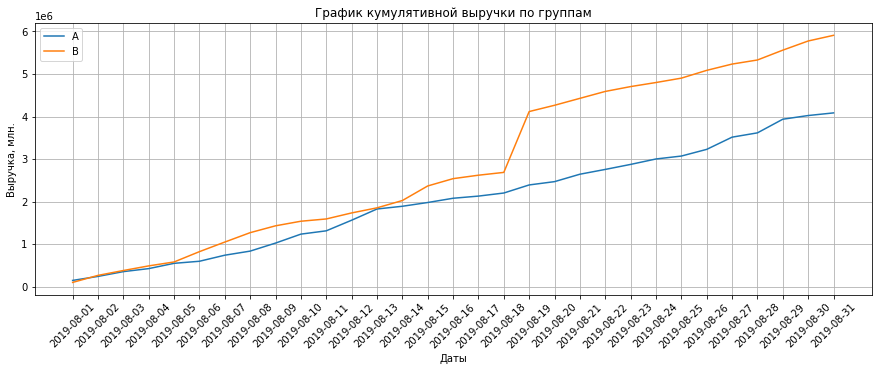

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(cum_data_a.date, cum_data_a.revenue, label = 'A')
plt.plot(cum_data_b.date, cum_data_b.revenue, label = 'B')
plt.legend()
ax.grid(True)
plt.xlabel('Даты')
plt.ylabel('Выручка, млн.')
plt.title('График кумулятивной выручки по группам')

#добавляем значения по оси х и формат подписи
ax.set_xticks(cum_data_a.date.dt.date)
ax.set_xticklabels(cum_data_a.date.dt.date,rotation=45 );

**Выводы и предположения по графику:**

В середине теста сегмент B вырвался вперед и продолжил лидировать весь остаток теста. Возможно, дело в аномально большом заказе, который повлиял на результат.

#### График кумулятивного среднего чека по группам

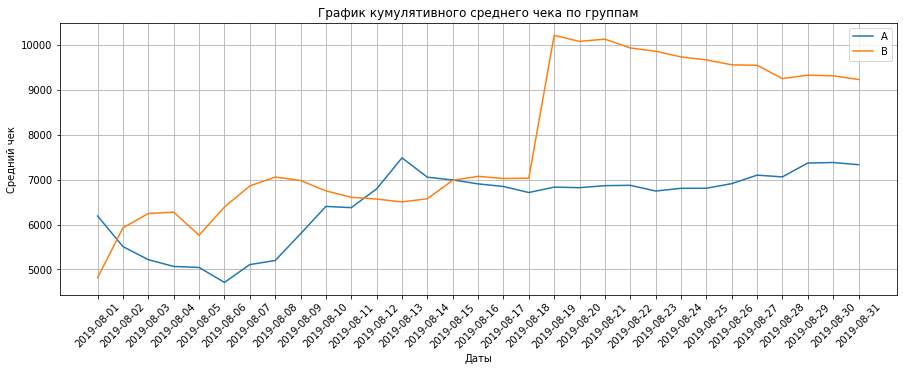

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(cum_data_a.date, cum_data_a.revenue/cum_data_a.orders, label = 'A')
plt.plot(cum_data_b.date, cum_data_b.revenue/cum_data_b.orders, label = 'B')
plt.legend()
ax.grid(True)
plt.xlabel('Даты')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')

#добавляем значения по оси х и формат подписи
ax.set_xticks(cum_data_a.date.dt.date)
ax.set_xticklabels(cum_data_a.date.dt.date,rotation=45 );

**Выводы и предположения по графику:**

- В начале тестирования лидировала групп B, средний чек повышался волнообразно вплоть до 18 дня теста, в который произошел резкий скачок (скорее всего аномально дорогая покупка). После этого наблюдаем плавное снижение, стабизизации в данной группе еще не произошло.
- У группы A первые 5 дней средний чек падал, затем начал заметный рост вплоть до 13 дня теста, в промежуток 11-14 дни теста он даже превысил чек группы B, однако затем немного снизился и стабилизировался на уровне существенно ниже среднего чека группы A.

<div class="alert alert-info">


</div>

#### График относительного изменения кумулятивного среднего чека группы B к группе A

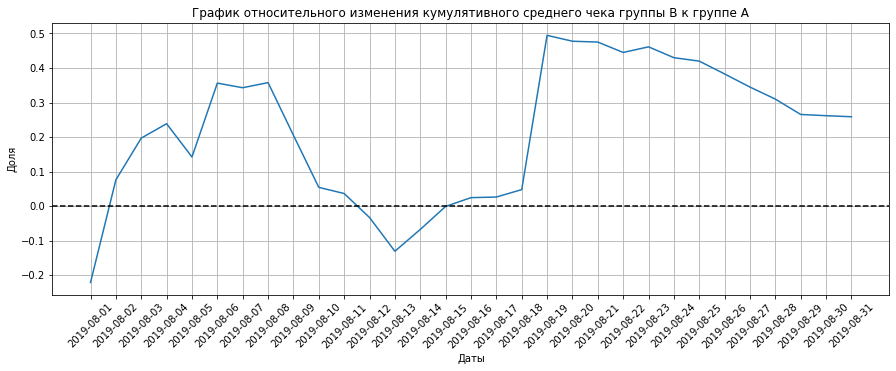

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(merged_cum_data.date, (
    (merged_cum_data.revenueB/merged_cum_data.ordersB) /
    (merged_cum_data.revenueA/merged_cum_data.ordersA)-1)
        )

plt.axhline(y=0, color='black', linestyle='--')

ax.grid(True)
plt.xlabel('Даты')
plt.ylabel('Доля')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

ax.set_xticks(merged_cum_data.date.dt.date)
ax.set_xticklabels(merged_cum_data.date.dt.date,rotation=45 );

**Выводы и предположения по графику:**

Результаты теста значительно менялись несколько раз. Колебания продолжаются, говорить о стабилизации еще рано.

#### График кумулятивного среднего количества заказов на посетителя по группам

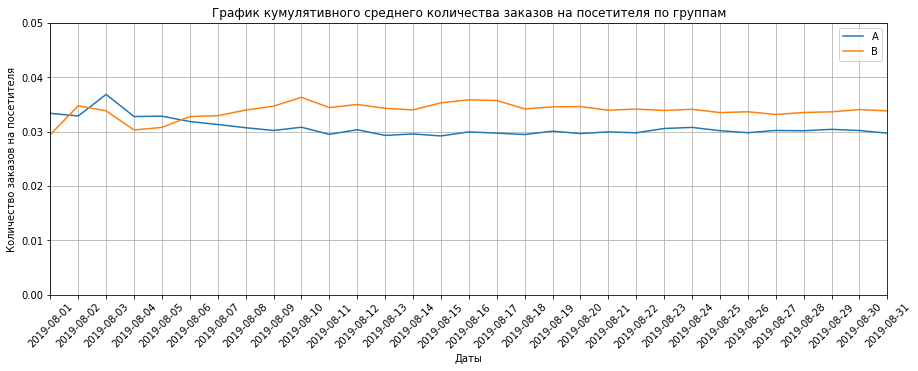

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(cum_data_a.date, cum_data_a.orders/cum_data_a.visitors, label = 'A')
plt.plot(cum_data_b.date, cum_data_b.orders/cum_data_b.visitors, label = 'B')

plt.legend()
ax.grid(True)
plt.xlabel('Даты')
plt.ylabel('Количество заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.axis([cum_data_a.date.min(), cum_data_a.date.max(),0, 0.05])
ax.set_xticks(cum_data_a.date.dt.date)
ax.set_xticklabels(cum_data_a.date.dt.date,rotation=45 );

**Выводы и предположения по графику:**

В начале теста наблюдались колебания среднего количества заказов на посетителя, но затем они стабилизировались и выровнялись приблизительно у одного значения, среднее количества заказов на посетителя сегмента B больше, чем у сегмента A.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя  группы B к группе A

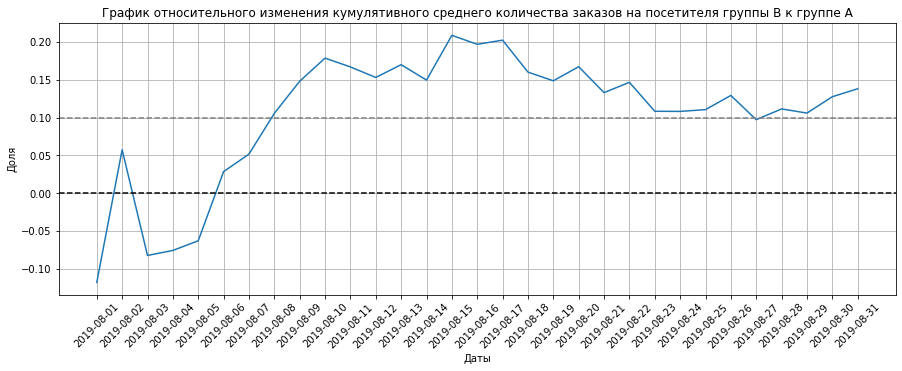

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(merged_cum_data.date, (
    (merged_cum_data.ordersB/merged_cum_data.visitorsB) /
    (merged_cum_data.ordersA/merged_cum_data.visitorsA)-1)
        )

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

ax.grid(True)
plt.xlabel('Даты')
plt.ylabel('Доля')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

ax.set_xticks(merged_cum_data.date.dt.date)
ax.set_xticklabels(merged_cum_data.date.dt.date,rotation=45 );

**Выводы и предположения по графику:**

Среднее количество заказов на посетителя группы B колеблется относительно группы A, но при этом виден прирост более 10%.

### Количество заказов по пользователям

In [30]:
orders_by_users = orders.groupby('visitor_id', as_index=False).agg(
    {'order_id':'nunique'}).sort_values(by='order_id', ascending = False)

orders_by_users.columns = ['visitor_id', 'orders']

orders_by_users.head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


#### Точечный график количества заказов по пользователям

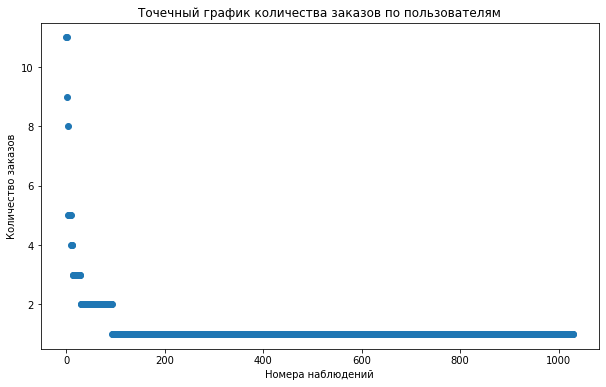

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

# серия из чисел от 0 до количества наблюдений в orders_by_users
x_values = pd.Series(range(0, len(orders_by_users)))

plt.scatter(x_values, orders_by_users.orders)

plt.xlabel('Номера наблюдений')
plt.ylabel('Количество заказов')
plt.title('Точечный график количества заказов по пользователям');

**Выводы и предположения по графику:**

В основном пользователи делают по одному заказу, небольшое количество - по 2 заказа. Большее количество заказов скорее всего - аномалия.

Определим это, рассчитав перцентили.

#### Расчет 95-й и 99-й перцентиля количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [32]:
print (np.percentile(orders_by_users.orders, [95,99]))

[2. 4.]


Не более 5% пользователей совершают 2 заказа и более, не более 1% пользователей совершает 4 и более заказов.

**Границей для определения аномальных пользователей выберу более двух заказов, отсеяв таким образов 5% значений.**

### Стоимость заказов

#### Точечный график стоимостей заказов

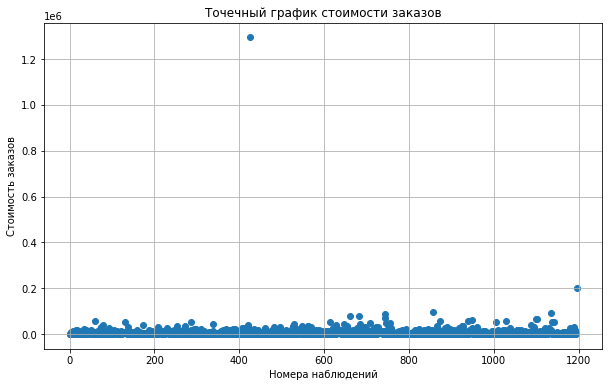

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

# серия из чисел от 0 до количества наблюдений
x_values = pd.Series(range(0, len(orders.revenue)))

plt.scatter(x_values, orders.revenue)

ax.grid(True)
plt.xlabel('Номера наблюдений')
plt.ylabel('Стоимость заказов')
plt.title('Точечный график стоимости заказов');

Сделала график без выбросов ниже

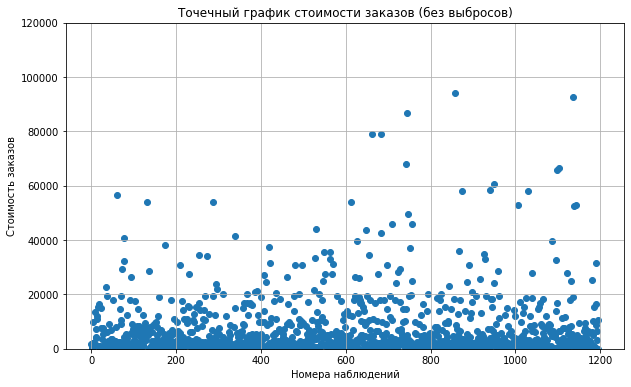

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

# серия из чисел от 0 до количества наблюдений
x_values = pd.Series(range(0, len(orders.revenue)))

plt.scatter(x_values, orders.revenue)

ax.grid(True)
plt.xlabel('Номера наблюдений')
plt.ylabel('Стоимость заказов')
plt.ylim(0,120000)
plt.title('Точечный график стоимости заказов (без выбросов)');

**Выводы и предположения по графику:**

В основном стоимость одного заказа до 50 тыс., большая стоимость заказов скорее всего - аномалия.

Определим это, рассчитав перцентили.

#### Расчет 95-й и 99-й перцентиля стоимости заказов. Выбор границы для определения аномальных заказов.

In [35]:
print (np.percentile(orders.revenue, [95,99]))

[28000.  58233.2]


Не более 5% заказов составляет 28000, не более 1% заказов дороже 58233.

**Границей для определения аномальных заказов выберу 30000, отсеяв таким образов от 1 до 5%  аномальных значений.**

### Определение аномальных пользователей

Определю список аномальных пользователей (более 2 заказов или заказ дороже 30000 или пользователь одновременно в двух группах)

In [36]:
users_with_many_orders = orders_by_users.query('orders >2')['visitor_id']

users_with_expensive_orders = orders.query('revenue > 30000')['visitor_id']

#id аномальных пользователей
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders, users_ab_dubl], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormal_users.head(5))
print('----------')
print(f'Количество аномальных пользователей {abnormal_users.count()}')

2         8300375
1099    148427295
44      199603092
928     204675465
51      232979603
Name: visitor_id, dtype: int64
----------
Количество аномальных пользователей 107


### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [37]:
#расчет количества заказов на посетителя по группам
orders_by_users_a = orders.query('group=="A"').groupby(
    'visitor_id', as_index = False).agg({'order_id' : 'nunique'})
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = orders.query('group=="B"').groupby(
    'visitor_id', as_index = False).agg({'order_id' : 'nunique'})
orders_by_users_b.columns = ['visitor_id', 'orders']

In [38]:
#расчет количества посетителей по датам по группам
visitors_a_daily = visitors.query('group=="A"')[['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_b_daily = visitors.query('group=="B"')[['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

In [39]:
#расчет количества заказов и выручки по датам по группам
orders_a_daily = (
    orders.query('group=="A"')[['date', 'order_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': 'nunique', 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']


orders_b_daily = (
    orders.query('group=="B"')[['date', 'order_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': 'nunique', 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

In [40]:
#таблица заказов, выручки, посетителей по дням в разрезе групп
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
        .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
)

data.sample(5)

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,visitors_per_date_a,visitors_per_date_b
27,2019-08-28,17,101122,28,96008,594,654
24,2019-08-25,10,68634,14,102862,621,679
26,2019-08-27,28,286780,16,147677,711,720
11,2019-08-12,24,249190,23,141554,595,543
28,2019-08-29,22,320690,20,231130,577,531


In [41]:
# Объявляю переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя
# пользователям без заказов — нули

sample_a = pd.concat(
[orders_by_users_a.orders, 
pd.Series(
    0, index = np.arange(data.visitors_per_date_a.sum() - len(orders_by_users_a.orders)), name='orders'
)], axis = 0)

sample_b = pd.concat(
[orders_by_users_b.orders, 
pd.Series(
    0, index = np.arange(data.visitors_per_date_b.sum() - len(orders_by_users_b.orders)), name='orders'
)], axis = 0)

Сформулирую гипотезы

H_0: Среднее количество заказов группы A = Среднему количеству заказов группы B

H_a: Среднее количество заказов группы A ≠ Среднему количеству заказов группы B

alpha = 0.05

In [42]:
#посчитаю статистическую значимость различия среднего количества заказов. Применю тест Манна-Уитни

alpha=0.05
results = st.mannwhitneyu(sample_a, sample_b)[1]

print("p-value {0:.5f}".format(results))

if (results < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу") 
    
#выведу относительный прирост среднего числа заказов группы B
print("Относительное различие в среднем между группами {0:.3f}".format(
    sample_b.mean()/sample_a.mean() - 1
)
     )

p-value 0.01679
Отвергаем нулевую гипотезу
Относительное различие в среднем между группами 0.138


**Выводы и предположения:**

По «сырым» данным различия в среднем числе заказов групп A и B есть. 

Среднее количество заказов группы B на 13,8% больше, чем у группы A.

p-value 1,68%, что меньше выбранного нами уровня значимости в 5%. 
    
Это значит, что вероятность получить такую же (13,8%) или меньшую разницу между средними количествами заказов групп составляет всего 1,68%.
Т.о. средние количества заказов в группах отличаются и это отличие существенное и не случайное, поэтому нулевая гипотеза отвергается

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулирую гипотезы

H_0: Средний чек группы A = Среднему чеку группы B

H_a: Средний чек группы A ≠ Среднему чеку группы B

alpha = 0.05

In [43]:
alpha=0.05
results = st.mannwhitneyu(
    orders.query('group=="A"')['revenue'],
    orders.query('group=="B"')['revenue']
    )[1]

print("p-value {0:.5f}".format(results))

if (results < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу") 
    
#выведу относительный прирост среднего чека группы B
print("Относительное различие в среднем между группами {0:.3f}".format(
    orders.query('group=="B"')['revenue'].mean()
    /orders.query('group=="A"')['revenue'].mean()
    -1
)
     )

p-value 0.72929
Не можем отвергнуть нулевую гипотезу
Относительное различие в среднем между группами 0.259


**Выводы и предположения:**

По «сырым» данным различий в среднем чеке групп A и B нет, а наблюдаемое превышение среднего чека группы В на 25,9% не является значимым, получено случайно.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [44]:
# Объявляю переменные, в которых пользователям с заказами без аномалий будет соответствовать число заказов пользователя
# пользователям без заказов — нули

sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data.visitors_per_date_a.sum() - len(orders_by_users_a.orders)
            ),
            name='orders')
    ], axis=0)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data.visitors_per_date_b.sum() - len(orders_by_users_b.orders)
            ),
            name='orders')
    ], axis=0)

Сформулирую гипотезы

H_0: Среднее количество заказов группы A  по "очищенным" данным = Среднему количеству заказов группы B по "очищенным" данным

H_a: Среднее количество заказов группы A по "очищенным" данным ≠ Среднему количеству заказов группы B по "очищенным" данным

alpha = 0.05

In [45]:
#посчитаю статистическую значимость различия среднего количества заказов. Применю тест Манна-Уитни

alpha=0.05
results = st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]

print("p-value {0:.5f}".format(results))

if (results < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу") 
    
#выведу относительный прирост среднего числа заказов группы B
print("Относительное различие в среднем между группами по 'очищенным' данным {0:.3f}".format(
    sample_b_filtered.mean()/sample_a_filtered.mean() - 1
)
     )

p-value 0.00972
Отвергаем нулевую гипотезу
Относительное различие в среднем между группами по 'очищенным' данным 0.187


**Выводы и предположения:**

По «очищенным» данным различия в среднем числе заказов групп A и B есть. 

Среднее количество заказов группы B на 18,7% больше, чем у группы A. Т.е после очистки данных разница между сегментами увеличилась еще сильнее, p-value уменьшился.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулирую гипотезы

H_0: Средний чек группы A по "очищенным" данным = Среднему чеку группы B по "очищенным" данным 

H_a: Средний чек группы A по "очищенным" данным ≠ Среднему чеку группы B по "очищенным" данным 

alpha = 0.05

In [46]:
alpha=0.05

revenue_a_filtered = orders[np.logical_and(
    orders['group'] == 'A',
    np.logical_not(orders['visitor_id'].isin(abnormal_users))
    )]['revenue']
    
revenue_b_filtered = orders[np.logical_and(
    orders['group'] == 'B',
    np.logical_not(orders['visitor_id'].isin(abnormal_users))
    )]['revenue']

results = st.mannwhitneyu(revenue_a_filtered, revenue_b_filtered)[1]

print("p-value {0:.5f}".format(results))

if (results < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу") 
    
#выведу относительный прирост среднего чека группы B
print("Относительное различие в среднем между группами {0:.3f}".format(
    revenue_b_filtered.mean() / revenue_a_filtered.mean() -1
)
     )

p-value 0.74088
Не можем отвергнуть нулевую гипотезу
Относительное различие в среднем между группами -0.027


**Выводы и предположения:**

По «очищенным» данным различий в среднем чеке групп A и B нет. 

P-value немного увеличился. Средний чек группы B на 2,7% ниже среднего чека группы A.
Хотя общие выводы по результатам теста не изменились, хорошо видно, как сильно аномалии могут влиять на результаты A/B-теста, ведь до очистки данных средний чек группы B был на 26% выше среднего чека группы A.

### Графики по "очищенным" данным

Построю графики относительного изменения среднего чека и количества заказов по очищенным данным

In [47]:
#агрегирую очищенные данные кумулятивно по заказам, визитам и выручке для каждой даты и группы
orders_filt = date_group.apply(
    lambda x: orders[np.logical_not(orders['visitor_id'].isin(abnormal_users))]
    [np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group'] 
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'order_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

/tmp/ipykernel_86/1788005579.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lambda x: orders[np.logical_not(orders['visitor_id'].isin(abnormal_users))]


In [48]:
#соединяю очищенные кумулятивные данные по заказам, визитам и выручке с посетителями для каждой даты и группы
cum_data_filt = orders_filt.merge(visitors_agg, on=['date', 'group'])

cum_data_filt.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [49]:
#кумулятивные очищенные показатели по группам
cum_data_a_f = cum_data_filt.query('group=="A"')
cum_data_b_f = cum_data_filt.query('group=="B"')
merged_cum_data_f = cum_data_a_f.merge(cum_data_b_f, on = 'date', how = 'left', suffixes = ['A', 'B'])

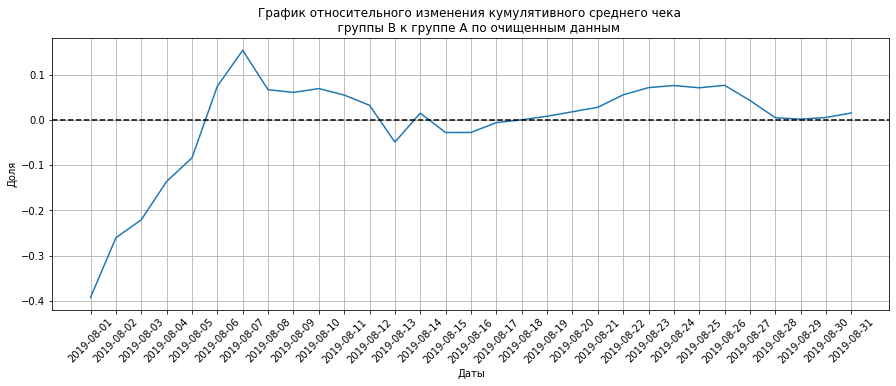

In [50]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(merged_cum_data.date, (
    (merged_cum_data_f.revenueB/merged_cum_data.ordersB) /
    (merged_cum_data_f.revenueA/merged_cum_data.ordersA)-1)
        )

plt.axhline(y=0, color='black', linestyle='--')

ax.grid(True)
plt.xlabel('Даты')
plt.ylabel('Доля')
plt.title(
    '''График относительного изменения кумулятивного среднего чека 
    группы B к группе A по очищенным данным''')

ax.set_xticks(merged_cum_data_f.date.dt.date)
ax.set_xticklabels(merged_cum_data_f.date.dt.date,rotation=45 );

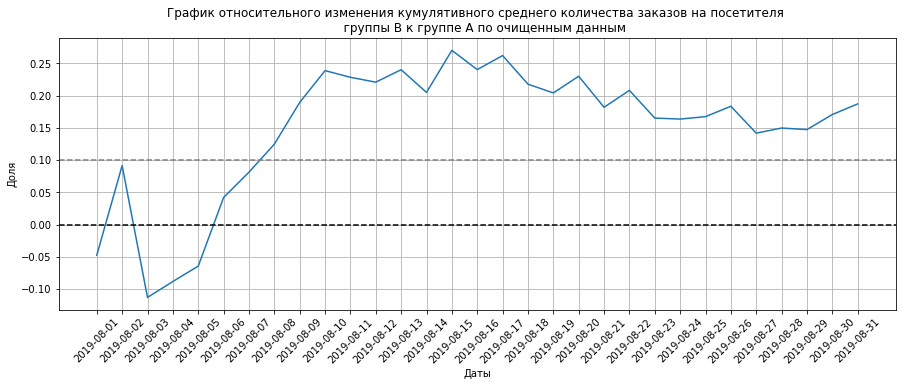

In [51]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(merged_cum_data_f.date, (
    (merged_cum_data_f.ordersB/merged_cum_data_f.visitorsB) /
    (merged_cum_data_f.ordersA/merged_cum_data_f.visitorsA)-1)
        )

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

ax.grid(True)
plt.xlabel('Даты')
plt.ylabel('Доля')
plt.title(
    '''График относительного изменения кумулятивного среднего количества заказов на посетителя 
    группы B к группе A по очищенным данным''')

ax.set_xticks(merged_cum_data.date.dt.date)
ax.set_xticklabels(merged_cum_data.date.dt.date,rotation=45 );

### Выводы по разделу

- Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия количества заказов между группами сообщает, что результаты группы B лучше группы A и есть тенденция к дальнейшему улучшению
- График различия среднего чека говорит о том, что результаты группы B нестабильны, колеблются на уровне результатов группы A

**Исходя из обнаруженных фактов, тест следует остановить и признать успеешным, зафиксировать победу группы B. Увеличение количества заказов при практически неизменном среднем чеке считаю положительным результатом**